<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Transfer_learning_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th Jan, 2023
# Train an Image Classifier with fastai and Transfer Learning
# Ref:
#      https://www.analyticsvidhya.com/blog/2021/05/training-state-of-the-art-deep-learning-models-with-fast-ai/
# Use GPU to accelerate training (Edit->Notebook settings)    

In [ ]:
!pip install fastai --upgrade

In [ ]:
 # To see prettier help using doc()
 !pip install nbdev

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# Call libraries:
from fastai.vision.all import *

In [3]:
# Download data
path = untar_data(URLs.MNIST)

In [4]:
# list directory contents 
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [5]:
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True)

In [6]:
doc(ImageDataLoaders.from_folder)

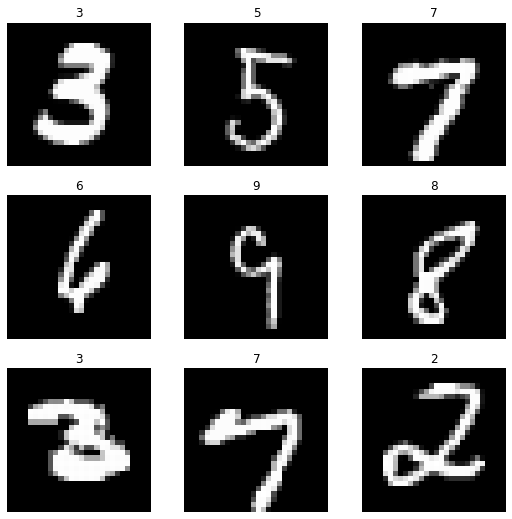

In [7]:
# Look at a batch of images
dls.train.show_batch()


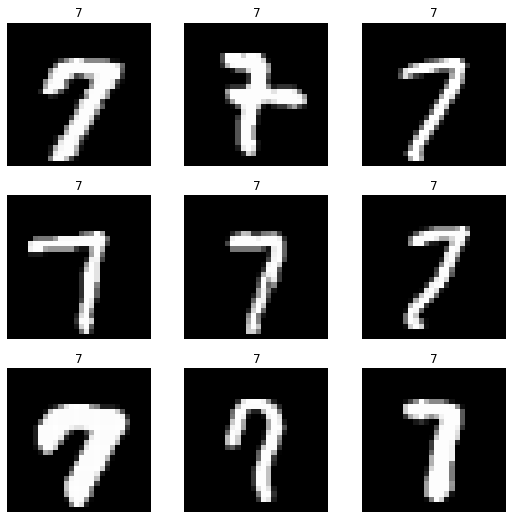

In [8]:
dls.valid.show_batch()

In [9]:
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [10]:
# Train for 4-epochs
# Use GPU for faster training (Edit->Notebook settings)
# CPU consumes around 8 minutes per epoch
# GPU takes 1.30 minutes per epoch
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.697555,0.441798,0.858500,0.141500,01:17


epoch,train_loss,valid_loss,accuracy,error_rate,time


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.131508,0.064983,0.979600,0.020400,01:12
1,0.076328,0.047094,0.985700,0.014300,01:11
2,0.031929,0.032133,0.991000,0.009000,01:11
3,0.015049,0.029735,0.991100,0.008900,01:12


In [11]:
# get all the image paths from testing folder
images = get_image_files(path / 'testing')

In [12]:
# select an image and display
img = PILImage.create(images[4432])
img

In [13]:
# predict the image class
lbl, _ , _ = learn.predict(img)
lbl

'6'

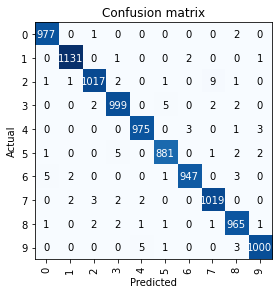

In [14]:
# We can also generate classification report from the model for inference
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

In [ ]:
################# Done ######################33